In [1]:
import flor
import numpy as np
import time

In [2]:
flor.setNotebookName('Twitter_Demo.ipynb')

with flor.Experiment("twitter_demo") as ex:
    ex.groundClient('git') #use "git" for grit

    tweets = ex.artifact('tweets.csv', 'tweets_loc')

    frac = ex.literal(0.75, 'frac')
    split_seed = ex.literal(42, 'seed')

    from split import split
    do_split = ex.action(split, [tweets, frac, split_seed])
    training_tweets = ex.artifact('training_tweets.pkl', 'tweet_df', do_split)
    testing_tweets = ex.artifact('testing_tweets.pkl', 'test_df', do_split)

    alpha = ex.literalForEach(np.linspace(0.0, 1.0, 2).tolist(), 'alpha')
    # alpha.forEach()

    from train_model import train
    do_train = ex.action(train, [training_tweets, alpha])
    model = ex.artifact('model.pkl', 'intermediary', do_train)

    from test_model import test
    do_test = ex.action(test, [model, testing_tweets])
    model_accuracy = ex.artifact('model_accuracy.txt', 'model_accuracy', do_test)

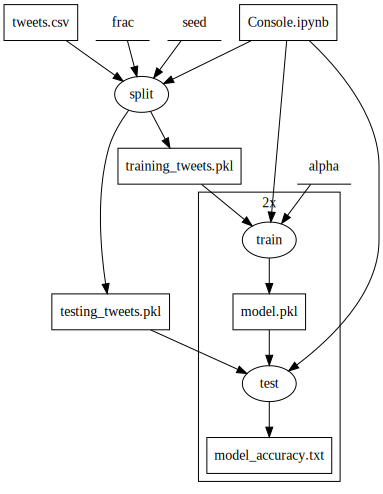

In [3]:
model_accuracy.plot()